In [1]:
import data_processing

In [2]:
data_processing.main()

0 23


In [ ]:
import pycrfsuite
import os
import pickle
import crfsuite_data
from crfsuite_data import prepare_data

with open(os.path.join("data/out", "train.pkl"), "rb") as f:
    train = pickle.load(f)

# trainer = pycrfsuite.Trainer(algorithm = 'ap',verbose=True)
trainer = pycrfsuite.Trainer(algorithm = 'pa',verbose=True)
#rainer = pycrfsuite.Trainer(algorithm = 'arow',verbose=True)
trainer.set_params({
                    'type':3,
                     'c': 0.1, # coefficient for L1 penalty
#                     'c2': 0.01,  # coefficient for L2 penalty
                    'max_iterations': 2000,
                    'feature.possible_transitions': False,
                    'feature.possible_states': False
                   })

# for i, data in enumerate(train):
#     temp = prepare_data(data)
#     for features, ylabel in temp:
#         trainer.append(features, ylabel)
#     trainer.train("exp_{}".format(i))
#     print("Model {} Trained".format(i))


temp = prepare_data(train[4])
for features, ylabel in temp:
    trainer.append(features, ylabel)
trainer.train("exp_{}".format(4))
print("Model {} Trained".format(4))


In [16]:
import os
import pickle
import pycrfsuite

from crfsuite_data import prepare_data
from reporting import StatsManager, pretty_print_report, pretty_rl_table

with open(os.path.join("data/out", "test.pkl"), "rb") as f:
    test = pickle.load(f)


data = test[0]

tagger = pycrfsuite.Tagger()
tagger.open('exp_{}'.format(0))

y_pred = []
y_true = []
feature_total = []

temp = prepare_data(data)

for features, ylabel in temp:
    
          feature_total.append(features)  #900*n 
        
          y_true.append(ylabel)#900*n
            
          y_pred.append(tagger.tag(features))
            

            

In [17]:
import numpy as np
f_num = []

for i, value in enumerate(feature_total):
    for j in value:
#         if j['is_card'] == True:
#             f_num.append(1)    
        if j['is_face'] == True:
            f_num.append(2)
        elif j['is_dice'] == True:
            f_num.append(3)
        elif j['is_key'] == True:
            f_num.append(4)
        elif j['is_map'] == True:
            f_num.append(5)    
        elif j['is_ball'] == True:
            f_num.append(6)    
        else:
            f_num.append(np.nan)


In [ ]:
# feature_total[0][0]['is_card']
len(feature_total[0])
len(y_true[0])
len(y_pred[0])

In [ ]:
import numpy as np

from collections import defaultdict
from itertools import chain

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from prettytable import PrettyTable

from constants import LABELS


lb = LabelBinarizer()
y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))

tagset = set(lb.classes_)
tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}

report = classification_report(y_true_combined,y_pred_combined,labels=[class_indices[cls] for cls in tagset],
                               target_names=tagset, output_dict=True)
                              


In [ ]:
def pretty_print_report(report):
    table = PrettyTable(["", "Precision", "Recall", "F1-Score", "Support"])
    for obj in report:
        if obj in LABELS.keys():
            precision = report[obj]["precision"]
            recall = report[obj]["recall"]
            f1 = report[obj]["f1-score"]
            sup = report[obj]["support"]
            table.add_row([obj, "{:03.2f} ".format(precision),
                           "{:03.2f}".format(recall),
                           "{:03.2f} ".format(f1),
                           "{:03.2f} ".format(sup)])

    print(table)

pretty_print_report(report)    

In [18]:
from constants import LABELS
import numpy as np

gt_final = []
for i, value in enumerate (y_true):
    for key in value:
        if LABELS[key] == 0:
            gt_final.append(np.nan)
#             gt_final.append(0)
        else:
            gt_final.append(LABELS[key])
            
pred_final = []

for i, value in enumerate (y_pred):
    for key in value:
        if LABELS[key] == 0:
            pred_final.append(np.nan)
#             pred_final.append(0)
        else:
            pred_final.append(LABELS[key])            

In [62]:
# print(y_true[0][0])
print(y_true[18][823])
print(f_num[17017])
# print(gt_final[900:950])
# print(feature_total[0][215])
# print(train[0][0]['ball_bbox'])

face


IndexError: list index out of range

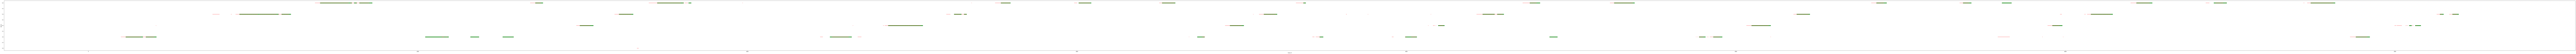

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=[500,10])
plt.ylabel('objects')
plt.xlabel('frame #')
#plt.plot(range(len(gt_final)),gt_final,'go',range(len(pred_final)),pred_final,'r-')
plt.plot(range(len(gt_final)),gt_final,'go',range(len(f_num)),f_num,'r-')
# plt.plot(range(900,950),gt_final[900:950],'go',range(900,950),f_num[900:950],'r-')
#plt.plot(range(len(pred_final)),pred_final,'ro')

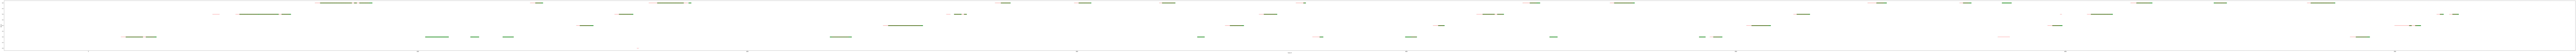

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=[500,10])
plt.ylabel('objects')
plt.xlabel('frame #')
plt.plot(range(len(gt_final)),gt_final,'go',range(len(pred_final)),pred_final,'r-')
# plt.plot(range(len(gt_final)),gt_final,'go',range(len(f_num)),f_num,'r-')
# plt.plot(range(17017,17030),gt_final[17017:17030],'go',range(17017,17030),f_num[17017:17030],'r-')
#plt.plot(range(len(pred_final)),pred_final,'ro')

In [ ]:
from collections import Counter
info = tagger.info()
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-6s %s" % (weight, label, attr))    

print("Top positive:")
print_state_features(Counter(info.state_features).most_common(50))

print("\nTop negative:")
print_state_features(Counter(info.state_features).most_common()[-50:])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['none','face','dice','key','map','ball']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(gt_final, pred_final,
                      title='Confusion matrix')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(gt_final, pred_final)
print(cm)

In [ ]:
y_true[0]